In [90]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns


ecomm_data = pd.read_csv('pakistan_ecommerce_dataset.csv')
ecomm_data


C:\Users\Zain\AppData\Local\Temp\ipykernel_17944\1894651622.py:7: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  ecomm_data = pd.read_csv('pakistan_ecommerce_dataset.csv')


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
ecomm_data.columns = ecomm_data.columns.str.rstrip()
ecomm_data

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
ecomm_data = ecomm_data.drop(ecomm_data.index[ecomm_data.isna().all(axis=1)])
ecomm_data

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,...,8.0,2018-8,8-2018,FY19,115320.0,NaN,NaN,NaN,NaN,NaN
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,...,8.0,2018-8,8-2018,FY19,115326.0,NaN,NaN,NaN,NaN,NaN
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,8.0,2018-7,8-2018,FY19,113474.0,NaN,NaN,NaN,NaN,NaN
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,8.0,2018-7,8-2018,FY19,113474.0,NaN,NaN,NaN,NaN,NaN


In [93]:
ecomm_data = ecomm_data.iloc[:, :-5]
ecomm_data

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,...,cod,8/28/2018,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0


In [94]:
ecomm_data.rename(columns={'category_name_1': 'product_category'}, inplace=True)
ecomm_data

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,product_category,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,...,cod,8/28/2018,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0


In [95]:
ecomm_data['payment_method'] = ecomm_data['payment_method'].replace('cod', 'cash')
ecomm_data

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,product_category,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cash,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cash,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cash,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cash,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cash,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,...,cash,8/28/2018,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0


In [96]:
ecomm_data.loc[ecomm_data['payment_method'] != "cash", 'payment_method'] = "digital"
ecomm_data

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,product_category,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cash,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cash,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cash,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cash,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cash,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,...,cash,8/28/2018,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,...,digital,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,digital,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,digital,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0


In [97]:
ecomm_data['product_category'] = ecomm_data['product_category'].replace('Soghaat', 'Food')
ecomm_data

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,product_category,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cash,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cash,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cash,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cash,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Food,\N,...,cash,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,...,cash,8/28/2018,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,...,digital,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,digital,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,digital,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0


In [98]:
ecomm_data = ecomm_data.drop(['increment_id','sales_commission_code','Working Date','BI Status','M-Y',' MV'],axis=1)
ecomm_data

,item_id,status,created_at,sku,price,qty_ordered,grand_total,product_category,discount_amount,payment_method,Year,Month,Customer Since,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,Women's Fashion,0.0,cash,2016.0,7.0,2016-7,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,Beauty & Grooming,0.0,cash,2016.0,7.0,2016-7,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,Women's Fashion,0.0,cash,2016.0,7.0,2016-7,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,Beauty & Grooming,300.0,cash,2016.0,7.0,2016-7,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,Food,0.0,cash,2016.0,7.0,2016-7,FY17,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,Women's Fashion,0.0,cash,2018.0,8.0,2018-8,FY19,115320.0
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,Mobiles & Tablets,0.0,digital,2018.0,8.0,2018-8,FY19,115326.0
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,Mobiles & Tablets,0.0,digital,2018.0,8.0,2018-7,FY19,113474.0
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,Mobiles & Tablets,0.0,digital,2018.0,8.0,2018-7,FY19,113474.0


In [99]:
# Calculating the average of the column
column_average = ecomm_data['price'].mean()

# Assigning the average to values less than 50
ecomm_data.loc[ecomm_data['price'] < 50, 'price'] = column_average

In [100]:
Q1 = ecomm_data['price'].quantile(0.25)
print(Q1)
Q3 = ecomm_data['price'].quantile(0.75)
print(Q3)

quarts = [0, Q1, Q3, float('inf')]

labels = ['Low', 'Medium', 'High']

ecomm_data['price_category'] = pd.cut(ecomm_data['price'], bins = quarts, labels = labels)
ecomm_data


399.0
5500.0


,item_id,status,created_at,sku,price,qty_ordered,grand_total,product_category,discount_amount,payment_method,Year,Month,Customer Since,FY,Customer ID,price_category
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,Women's Fashion,0.0,cash,2016.0,7.0,2016-7,FY17,1.0,Medium
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,Beauty & Grooming,0.0,cash,2016.0,7.0,2016-7,FY17,2.0,Low
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,Women's Fashion,0.0,cash,2016.0,7.0,2016-7,FY17,3.0,Medium
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,Beauty & Grooming,300.0,cash,2016.0,7.0,2016-7,FY17,4.0,Low
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,Food,0.0,cash,2016.0,7.0,2016-7,FY17,5.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,8/28/2018,WOFSCE5AE00357AECDE,699.0,1.0,849.0,Women's Fashion,0.0,cash,2018.0,8.0,2018-8,FY19,115320.0,Medium
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,Mobiles & Tablets,0.0,digital,2018.0,8.0,2018-8,FY19,115326.0,High
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,Mobiles & Tablets,0.0,digital,2018.0,8.0,2018-7,FY19,113474.0,High
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,Mobiles & Tablets,0.0,digital,2018.0,8.0,2018-7,FY19,113474.0,High


In [101]:
# Creating a frequency table for the 'Category' column
frequency_table = ecomm_data['product_category'].value_counts().reset_index()
frequency_table.columns = ['Category', 'Frequency']
frequency_table

,Category,Frequency
0,Mobiles & Tablets,115710
1,Men's Fashion,92221
2,Women's Fashion,59721
3,Appliances,52413
4,Superstore,43613
5,Beauty & Grooming,41496
6,Food,34011
7,Others,29218
8,Home & Living,26504
9,Entertainment,26326


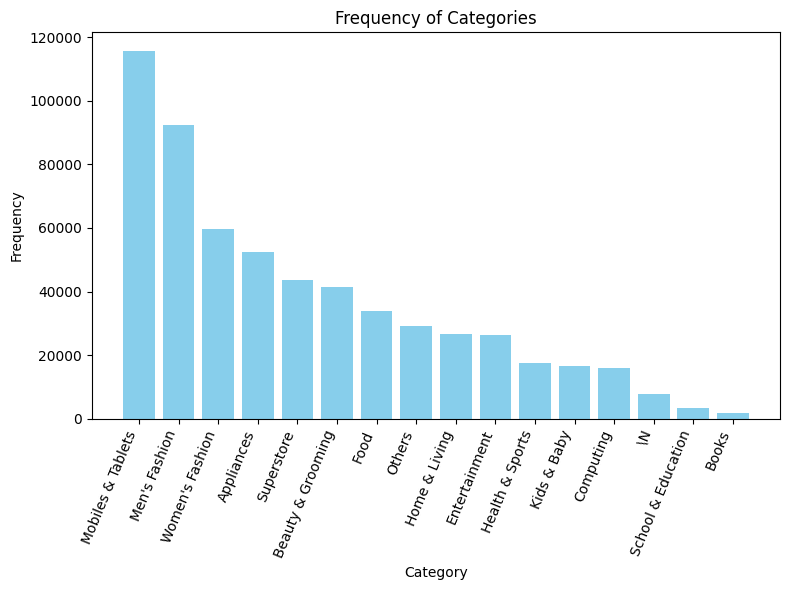

In [102]:
# Plotting the frequency table
plt.figure(figsize=(8, 6))
plt.bar(frequency_table['Category'], frequency_table['Frequency'], color='skyblue')
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=67.5, ha='right')
plt.tight_layout() 
plt.show()

In [103]:
# Creating a frequency table for the 'status' column
frequency_table2 = ecomm_data['status'].value_counts().reset_index()
frequency_table2.columns = ['Status', 'Frequency']
frequency_table2

,Status,Frequency
0,complete,233685
1,canceled,201249
2,received,77290
3,order_refunded,59529
4,refund,8050
5,cod,2859
6,paid,1159
7,closed,494
8,payment_review,57
9,pending,48


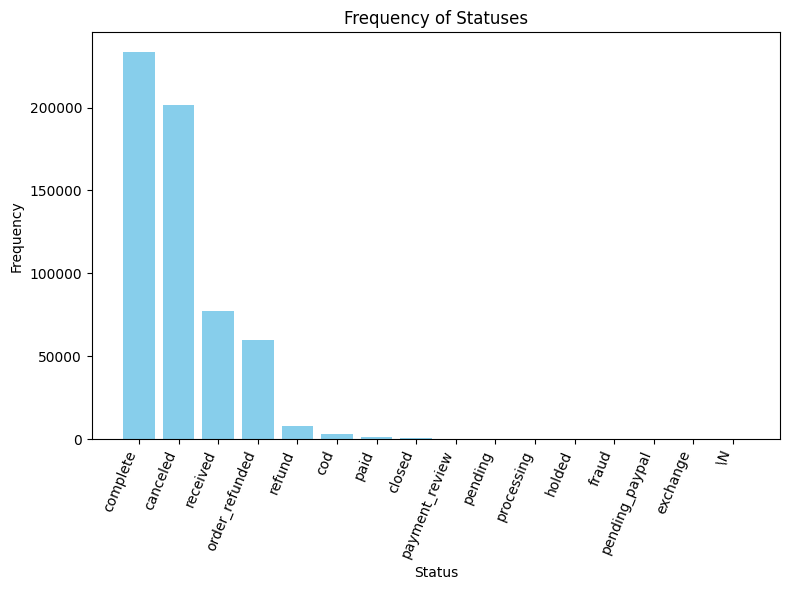

In [104]:
plt.figure(figsize=(8, 6))
plt.bar(frequency_table2['Status'], frequency_table2['Frequency'], color='skyblue')
plt.title('Frequency of Statuses')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks(rotation=67.5, ha='right')
plt.tight_layout() 
plt.show()

In [105]:
# Creating a frequency table for the 'Month' column
frequency_table3 = ecomm_data['Month'].value_counts().reset_index()
frequency_table3.columns = ['Month', 'Frequency']
frequency_table3

,Month,Frequency
0,11.0,155456
1,5.0,62603
2,3.0,61489
3,8.0,48514
4,7.0,39151
5,2.0,38777
6,6.0,34530
7,4.0,34091
8,10.0,30623
9,12.0,29199


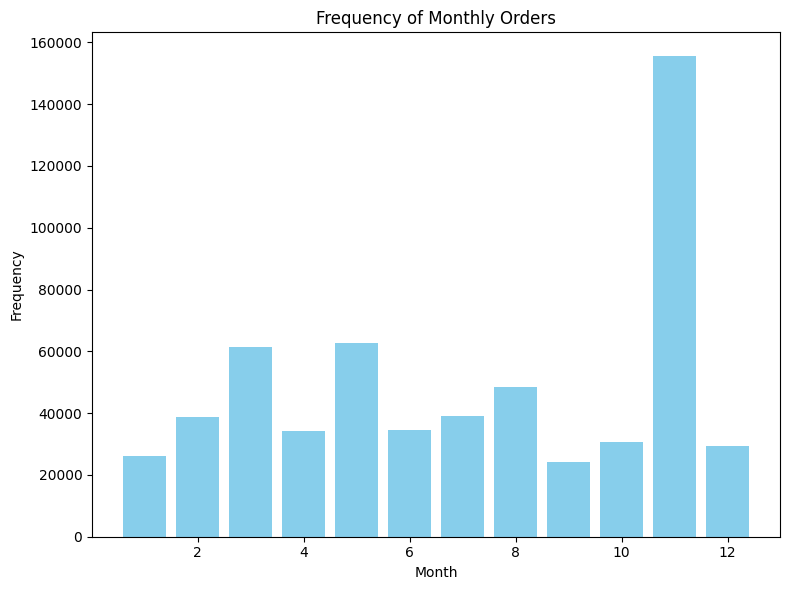

In [106]:
plt.figure(figsize=(8, 6))
plt.bar(frequency_table3['Month'], frequency_table3['Frequency'], color='skyblue')
plt.title('Frequency of Monthly Orders')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.tight_layout() 
plt.show()

In [107]:
chi_table = pd.crosstab(ecomm_data['product_category'],ecomm_data['price_category'])
chi_table

price_category,Low,Medium,High
product_category,,,
Appliances,1877,26699,23837
Beauty & Grooming,20632,19380,1484
Books,588,599,683
Computing,2375,7868,5690
Entertainment,232,5282,20812
Food,25205,8125,681
Health & Sports,7571,9189,742
Home & Living,10911,14531,1062
Kids & Baby,8666,7628,200


Text(0.5, 1.0, 'Stacked Bar Chart of Contingency Table')

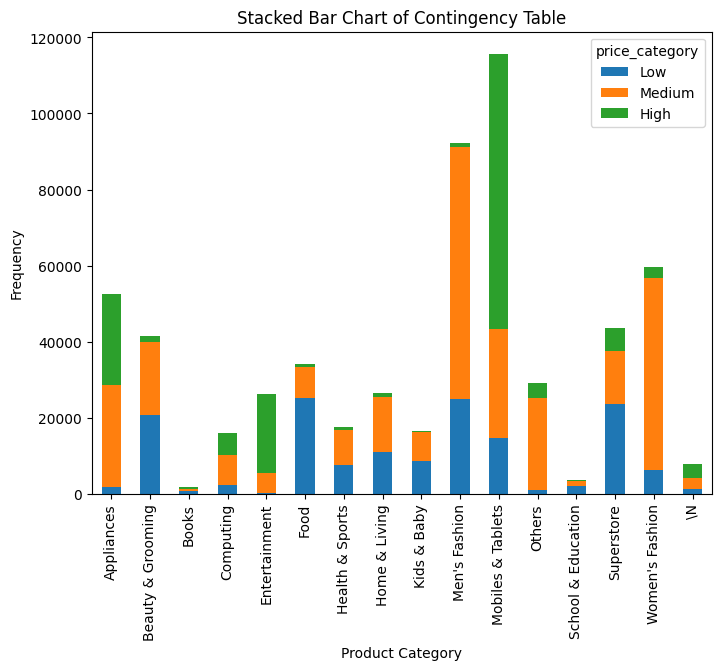

In [108]:
chi_table.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of Contingency Table')

In [109]:
chi2_stat, p_value, dof, expected_data = chi2_contingency(chi_table)
chi2_stat

326739.77284425497

In [110]:
p_value

0.0

In [111]:
dof

30

In [112]:
expected_data

array([[13635.39855397, 25695.33960743, 13082.26183859],
       [10795.30838524, 20343.30819358, 10357.38342118],
       [  486.48608734,   916.76273188,   466.75118078],
       [ 4145.01755596,  7811.11262407,  3976.86981997],
       [ 6848.78755904, 12906.25437402,  6570.95806695],
       [ 8848.06327093, 16673.80602882,  8489.13070025],
       [ 4553.19759395,  8580.31087343,  4368.49153262],
       [ 6895.09479088, 12993.51842015,  6615.38678897],
       [ 4290.96338216,  8086.14144363,  4116.89517421],
       [23991.56869567, 45211.11010507, 23018.32119926],
       [30102.30222808, 56726.53246287, 28881.16530906],
       [ 7601.15      , 14324.05      ,  7292.8       ],
       [  904.81209186,  1705.0806318 ,   868.10727634],
       [11346.05226059, 21381.16204566, 10885.78569375],
       [15536.59658943, 29278.06797351, 14906.33543706],
       [ 2042.20095489,  3848.44248409,  1959.35656102]])

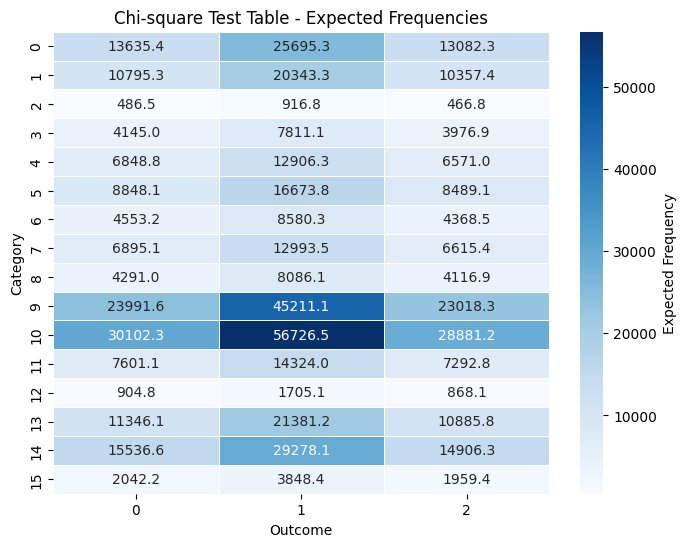

In [113]:
# Plotting a heatmap of the chi-square test table
plt.figure(figsize=(8, 6))
sns.heatmap(expected_data, annot=True, cmap='Blues', fmt=".1f", linewidths=.5, cbar_kws={'label': 'Expected Frequency'})
plt.title('Chi-square Test Table - Expected Frequencies')
plt.xlabel('Outcome')
plt.ylabel('Category')
plt.show()

In [114]:
most_exp = ecomm_data[['product_category','price']].sort_values(by = 'price', ascending=False).head(10)
most_exp

,product_category,price
509081,Beauty & Grooming,1012625.9
309775,Entertainment,515975.0
207347,Appliances,479000.0
207276,Appliances,479000.0
251159,Appliances,479000.0
251158,Appliances,479000.0
124009,Entertainment,330499.0
182896,Entertainment,330499.0
423756,Entertainment,320000.0
341453,Computing,307970.0


In [115]:
least_exp = ecomm_data[['product_category','price']].sort_values(by = 'price', ascending=True).head(10)
least_exp

,product_category,price
197479,Superstore,50.0
117454,Superstore,50.0
117459,Superstore,50.0
117460,Superstore,50.0
117467,Superstore,50.0
117471,Superstore,50.0
117472,Superstore,50.0
107834,Superstore,50.0
117480,Superstore,50.0
117483,Superstore,50.0
